# Week 8 Tutorial Part-1: Object Detection Using Faster R-CNN

## Welcome to the 8th Lab of 42028: Deep Learning and CNN! 

In this Lab/Tutorial session, you will learn how to train an object detection model for a custom dataset and evaluate its performance on a test dataset. 

In this lab, you will focus on the configuration of the Faster R-CNN object detector for a custom dataset. 

Let's get started!

## Tutorial:

1. Image annotation using CVAT: Computer Vision Annotation Tool 
   (Reference: https://cvat.ai)
2. Creation of the custom YAML file for dataset
3. Training the model
4. Using the trained model for inference

## Tasks for this week:

1. Clone the Repository
2. Install libraries and download the dataset
3. Train the model using transfer learning from already trained models
4. Use a trained model for inference

## Clone the Repository

In [1]:
!git clone https://github.com/GitarthVaishnav/FasterRCNN42028.git

Cloning into 'FasterRCNN42028'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 124 (delta 51), reused 108 (delta 37), pack-reused 0
Receiving objects: 100% (124/124), 4.28 MiB | 10.76 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [2]:
# Enter the repo directory.
%cd FasterRCNN42028/

/content/FasterRCNN42028


In [3]:
# Install the Requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 

## Download the Dataset


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cd /content/FasterRCNN42028
!unzip -o /content/drive/MyDrive/42028/Assignment3/WeedDetection.v5i.voc.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/20210805_iPhoneSE_YL_113_jpg.rf.addd625018106deff592095996c42b62.xml  
 extracting: train/20210805_iPhoneSE_YL_115_jpg.rf.9f6a9162a59118459207aca9410c610a.jpg  
 extracting: train/20210805_iPhoneSE_YL_115_jpg.rf.9f6a9162a59118459207aca9410c610a.xml  
 extracting: train/20210805_iPhoneSE_YL_117_jpg.rf.b2fdcf31d7072bbc21bc3fe7a76f4d17.jpg  
 extracting: train/20210805_iPhoneSE_YL_117_jpg.rf.b2fdcf31d7072bbc21bc3fe7a76f4d17.xml  
 extracting: train/20210805_iPhoneSE_YL_118_jpg.rf.949a2b46384deedc1e4e3ff53b467fa9.jpg  
 extracting: train/20210805_iPhoneSE_YL_118_jpg.rf.949a2b46384deedc1e4e3ff53b467fa9.xml  
 extracting: train/20210805_iPhoneSE_YL_120_jpg.rf.11ee80f679262529daa8daec4355dbce.jpg  
 extracting: train/20210805_iPhoneSE_YL_120_jpg.rf.11ee80f679262529daa8daec4355dbce.xml  
 extracting: train/20210805_iPhoneSE_YL_121_jpg.rf.2b4157e8852be48fbc8564a5e829a004.jpg  
 extracting: train/20210805_iPhoneSE_YL_121_jpg.r

## Create the Custom Dataset YAML File.

In [6]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'train'
TRAIN_DIR_LABELS: 'train'
VALID_DIR_IMAGES: 'valid'
VALID_DIR_LABELS: 'valid'

# Class names.
CLASSES: [
    '__background__',
    'mollugo verticillata',
    'amaranthus palmeri',
    'eclipta',
    'portulaca oleracea',
    'amaranthus tuberculatus',
    'euphorbia maculata',
    'ipomoea indica',
    'eleusine indica',
    'sida rhombifolia',
    'senna obtusifolia',
    'physalis angulata',
    'ambrosia artemisiifolia'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 13

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


## Training

In [7]:
!wandb disabled

W&B disabled.


In [8]:
!python train.py --config data_configs/custom_data.yaml --epochs 60 --model fasterrcnn_resnet50_fpn_v2 --project-name weeds --batch-size 6 --no-mosaic

Not using distributed mode
device cuda
2023-05-08 08:34:24.389106: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 08:34:25.447463: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating data loaders
Number of training samples: 2090
Number of validation samples: 697

Building model from scratch...
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100% 167M/167M [00:08<00:00, 20.3MB/s]
Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                                         [100, 4]                  --
├─GeneralizedRCNNTran

## Visualize Validation Results

In [9]:
import matplotlib.pyplot as plt
import glob as glob

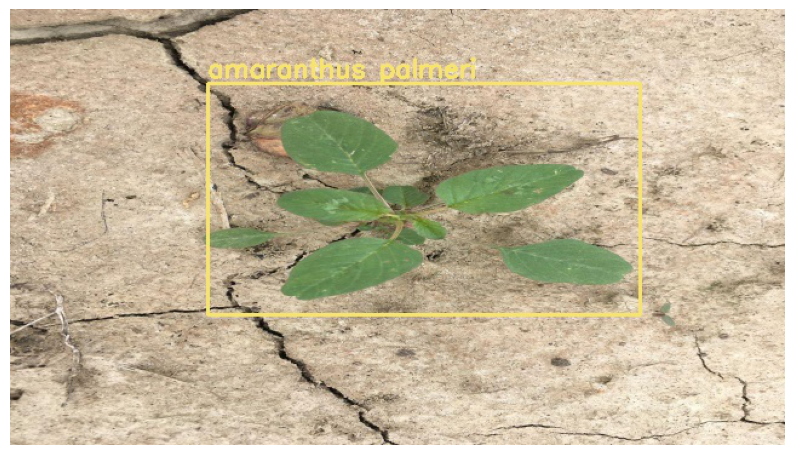

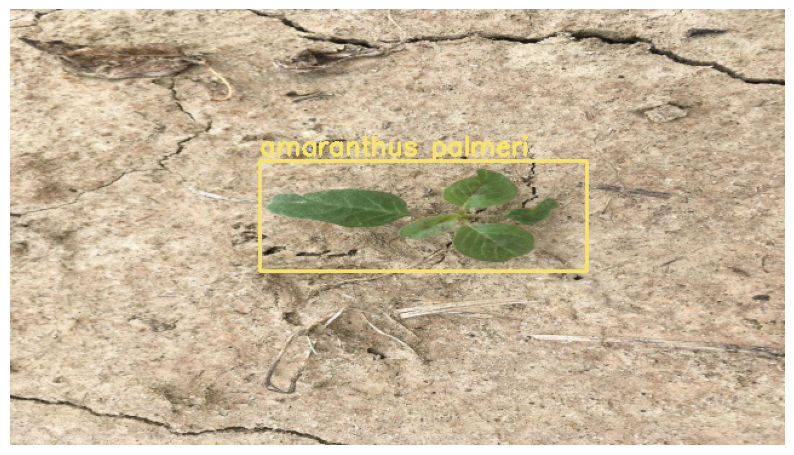

In [10]:
results_dir_path = '/content/FasterRCNN42028/outputs/training/weeds'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Evaluation

In [11]:
# No verbose mAP.
!python eval.py --weights outputs/training/weeds/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

100% 88/88 [00:43<00:00,  2.01it/s]


{'map': tensor(0.5375),
 'map_50': tensor(0.7901),
 'map_75': tensor(0.6464),
 'map_large': tensor(0.5833),
 'map_medium': tensor(0.1463),
 'map_per_class': tensor(-1.),
 'map_small': tensor(0.0661),
 'mar_1': tensor(0.5617),
 'mar_10': tensor(0.6394),
 'mar_100': tensor(0.6400),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.6834),
 'mar_medium': tensor(0.2558),
 'mar_small': tensor(0.1458)}


In [12]:
# Verbose mAP.
!python eval.py --weights outputs/training/weeds/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

100% 88/88 [00:43<00:00,  2.00it/s]


{'map': tensor(0.5375),
 'map_50': tensor(0.7901),
 'map_75': tensor(0.6464),
 'map_large': tensor(0.5833),
 'map_medium': tensor(0.1463),
 'map_per_class': tensor([0.5804, 0.6544, 0.4727, 0.4304, 0.5893, 0.4519, 0.5412, 0.6670, 0.5907,
        0.5962, 0.3587, 0.5165]),
 'map_small': tensor(0.0661),
 'mar_1': tensor(0.5617),
 'mar_10': tensor(0.6394),
 'mar_100': tensor(0.6400),
 'mar_100_per_class': tensor([0.6580, 0.7275, 0.5957, 0.5469, 0.7041, 0.5798, 0.6174, 0.7000, 0.7048,
        0.7146, 0.5429, 0.5889]),
 'mar_large': tensor(0.6834),
 'mar_medium': tensor(0.2558),
 'mar_small': tensor(0.1458)}


("Classes: ['__background__', 'mollugo verticillata', 'amaranthus palmeri', "
 "'eclipta', 'portulaca oleracea', 'amaranthus tuberculatus', 'euphorbia "
 "maculata', 'ipomoea indica', 'eleusine indica', 'sida rhombifolia', 'senna "
 "obtusifolia', 'physalis angulata', 'ambrosia artemisiifolia']")


AP / AR per class
---------------------------------

## Interference

#### Inference Code:
input image: `data/images/...` - this is the path to the image \\
path to weights: `outputs/training/proj_name/best_model.pth` \\


How to use:
`!python inference.py --input #path/to/image --weights #path/to/weights`


In [13]:
!python inference.py --input /content/FasterRCNN42028/train/20210628_iPhoneSE_YL_101_jpg.rf.713e4ca62ed7996f4426df173be8d4c0.jpg --weights outputs/training/weeds/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 4.407


In [14]:
image = plt.imread('/content/FasterRCNN42028/FasterRCNN42028/train/20210628_iPhoneSE_YL_101_jpg.rf.713e4ca62ed7996f4426df173be8d4c0.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

FileNotFoundError: ignored